# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

In [2]:
library(nnet)
library(MASS)

### Datos 1

In [3]:
datos1 <- read.table('data/datos1.txt', header = TRUE)
datos1$G <- as.factor(datos1$G)

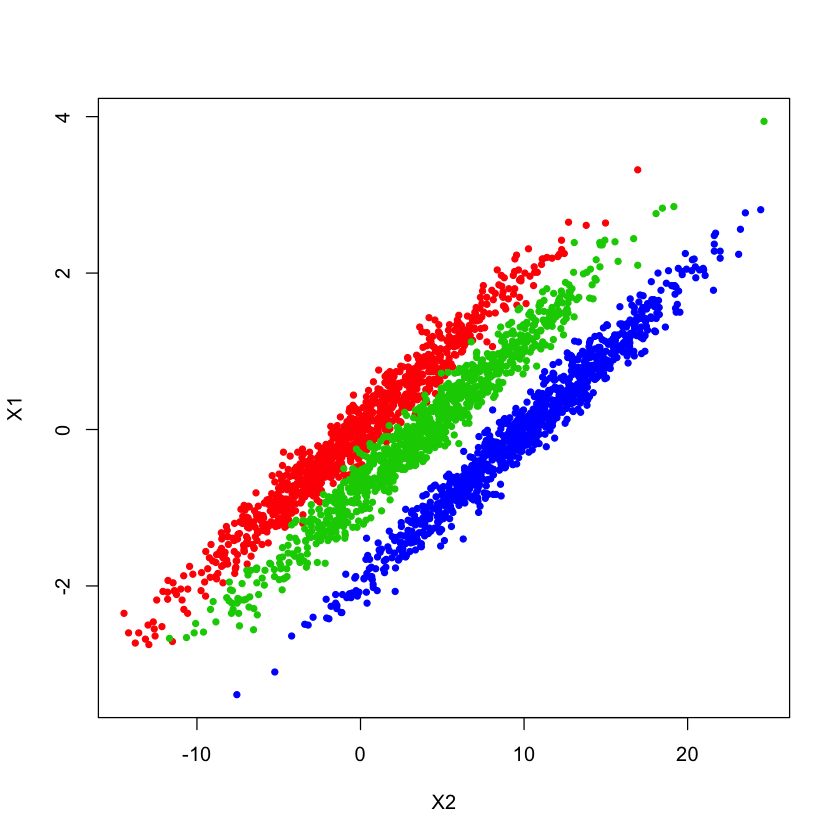

In [4]:
plot(X1 ~ X2, col = as.numeric(G) + 1, data = datos1, pch=20)

In [5]:
(fit.datos1 <- multinom(G ~ X1 + X2, data=datos1, hessian = TRUE))

# weights:  12 (6 variable)
initial  value 3295.836866 
iter  10 value 429.245499
iter  20 value 128.073643
iter  30 value 122.645527
iter  40 value 122.583734
iter  50 value 122.559239
iter  60 value 122.504338
iter  70 value 122.493994
iter  80 value 122.486304
iter  90 value 122.480082
iter 100 value 122.473220
final  value 122.473220 
stopped after 100 iterations


Call:
multinom(formula = G ~ X1 + X2, data = datos1, hessian = TRUE)

Coefficients:
  (Intercept)        X1        X2
2   -8.205141 -21.04663  4.201596
3  -75.721683 -69.37726 13.964826

Residual Deviance: 244.9464 
AIC: 256.9464 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [6]:
confint.default(fit.datos1)

2.5 %,97.5 %


##### Verosimilitud Perfil

In [7]:
confint(fit.datos1)

, , 2

                 2.5 %     97.5 %
(Intercept)  -9.493788  -6.916495
X1          -24.255591 -17.837663
X2            3.563312   4.839880

, , 3

                   2.5 %    97.5 %
(Intercept) -170.4806980 19.037331
X1          -136.0617535 -2.692773
X2             0.1426511 27.787001

#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

#### Predicciones

#### Otros Modelos

### Datos 2

In [8]:
datos2 <- read.table('data/datos2.txt', header = TRUE)
datos2$Y <- as.factor(datos2$Y)

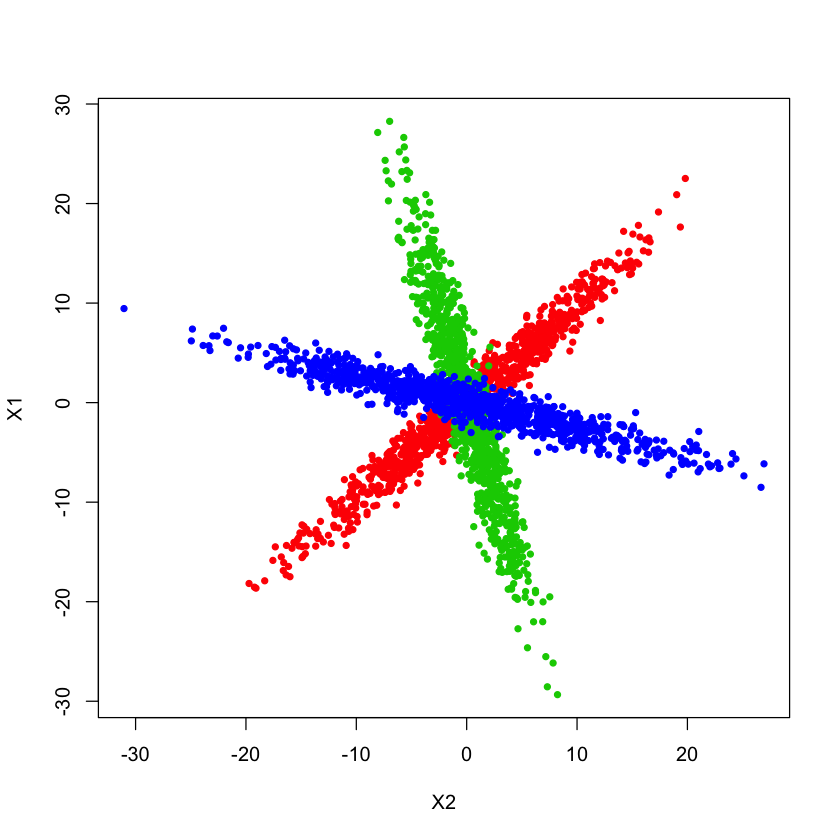

In [9]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos2, pch = 20)

In [10]:
(fit.datos2 <- multinom(Y ~ X1 + X2, data=datos2, hessian = TRUE))

# weights:  12 (6 variable)
initial  value 3295.836866 
final  value 3295.229689 
converged


Call:
multinom(formula = Y ~ X1 + X2, data = datos2, hessian = TRUE)

Coefficients:
    (Intercept)           X1           X2
2 -3.443332e-05 -0.003254659 0.0009150342
3 -1.012462e-03 -0.003562986 0.0054936263

Residual Deviance: 6590.459 
AIC: 6602.459 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [11]:
confint.default(fit.datos2)

2.5 %,97.5 %


##### Verosimilitud Perfil

In [12]:
confint(fit.datos2)

, , 2

                  2.5 %      97.5 %
(Intercept) -0.08769813 0.087629262
X1          -0.01577695 0.009267632
X2          -0.01167613 0.013506198

, , 3

                   2.5 %      97.5 %
(Intercept) -0.088718962 0.086694039
X1          -0.016087820 0.008961848
X2          -0.007094758 0.018082011

#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

#### Predicciones

#### Otros Modelos

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [13]:
n <- 5000
k <- 4

In [14]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1349 1207 1197 1247

In [15]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    ranges <- seq(min, max, length = k + 1)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], ranges[i], ranges[i + 1]))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    df$Y <- as.factor(df$Y)
    return(df)
}

In [16]:
ordinal.data <- GenerateSample(n.sampled, -50, 50)

In [17]:
ordinal.data <- cbind(ordinal.data, model.matrix( ~ 0 + Y, ordinal.data))

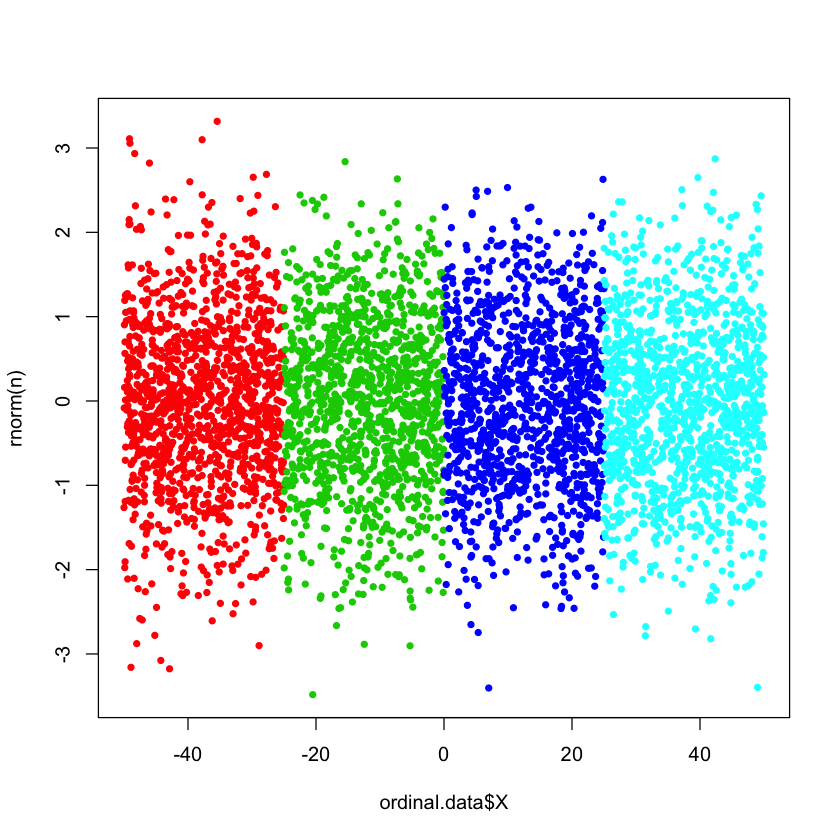

In [18]:
plot(ordinal.data$X, rnorm(n), col=as.numeric(ordinal.data$Y) + 1, pch=20)

In [19]:
(m <- multinom(Y ~ X + 1, data=ordinal.data))

# weights:  12 (6 variable)
initial  value 6931.471806 
iter  10 value 1525.539880
iter  20 value 195.526338
iter  30 value 33.350930
iter  40 value 19.619076
iter  50 value 13.533677
iter  60 value 5.445935
iter  70 value 5.138307
iter  80 value 5.113948
iter  90 value 5.097386
iter 100 value 4.969707
final  value 4.969707 
stopped after 100 iterations


Call:
multinom(formula = Y ~ X + 1, data = ordinal.data)

Coefficients:
  (Intercept)        X
2    570.0454  22.7987
3    571.3805 164.6537
4   -350.5573 201.5544

Residual Deviance: 9.939415 
AIC: 21.93941 

In [20]:
a <- c(coef(m)[, 2], mean(coef(m)[, 1]))

In [21]:
# polr(Y ~ X, data=ordinal.data, start = a)